In [2]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.autograd import Variable
from torchinfo import summary
import joblib
torch.manual_seed(42)

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [4]:
#single lstm Network definition
class NETWORK_SINGLE_LSTM(nn.Module):

    def __init__(self,num_classes,input_size,hidden_size,num_layers):
        super(NETWORK_SINGLE_LSTM,self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.lstm=nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True).to(device)
        self.fc=nn.Linear(hidden_size,num_classes)
    
    def forward(self,x):
        h_0=torch.randn(self.num_layers, x.size(0), self.hidden_size).requires_grad_().to(device)
        c_0=torch.randn(self.num_layers, x.size(0), self.hidden_size).requires_grad_().to(device)
        output_lstm, (h_n,c_n) = self.lstm(x, (h_0, c_0))
        input_fc=output_lstm[:,-1,:]
        output_fc=self.fc(input_fc).to(device)
        return output_fc

In [5]:
input_size=4
hidden_size=8
num_layers=1
num_classes=4

model=NETWORK_SINGLE_LSTM(num_classes,input_size, hidden_size,num_layers)
model.load_state_dict(torch.load('./assets/trained models state/LSTM_epochs_500_lr_0.01_hidden_8_layers_1.pt'))
model.eval()


NETWORK_SINGLE_LSTM(
  (lstm): LSTM(4, 8, batch_first=True)
  (fc): Linear(in_features=8, out_features=4, bias=True)
)

In [6]:
validation_data=pd.read_csv('./assets/processed dataset/validation dataset.csv')
test_data=pd.read_csv('./assets/processed dataset/test dataset.csv')
train_data=pd.read_csv('./assets/processed dataset/train dataset.csv')
scaler =joblib.load('./assets/scaler.gz')

In [7]:
df1=test_data
input_test=scaler.transform(df1)
input_test[0]

array([0.7025641 , 0.42316258, 0.25459318, 0.36398631])

In [8]:
seq_length=180
#Getting x and y for testing
X_test=[]
Y_test=[]

for i in range(seq_length,input_test.shape[0]):
    #Input features from 0 to 59
    X_test.append(input_test[i-seq_length:i])
    #T2M at 60
    Y_test.append(input_test[i])

# converting into numpy arrays
X_test,Y_test=np.array(X_test),np.array(Y_test)
Y_test=Y_test.reshape(-1,4)
print(X_test.shape,Y_test.shape)

X_test = Variable(torch.Tensor(X_test))
Y_test = Variable(torch.Tensor(Y_test))
print(X_test.shape,Y_test.shape)

(1957, 180, 4) (1957, 4)
torch.Size([1957, 180, 4]) torch.Size([1957, 4])


In [9]:
#Testing model
Y_pred=model(X_test.to(device))
Y_pred=Y_pred.detach().numpy()

In [10]:
Y_pred_de=scaler.inverse_transform(Y_pred)
Y_test_de=scaler.inverse_transform(Y_test)

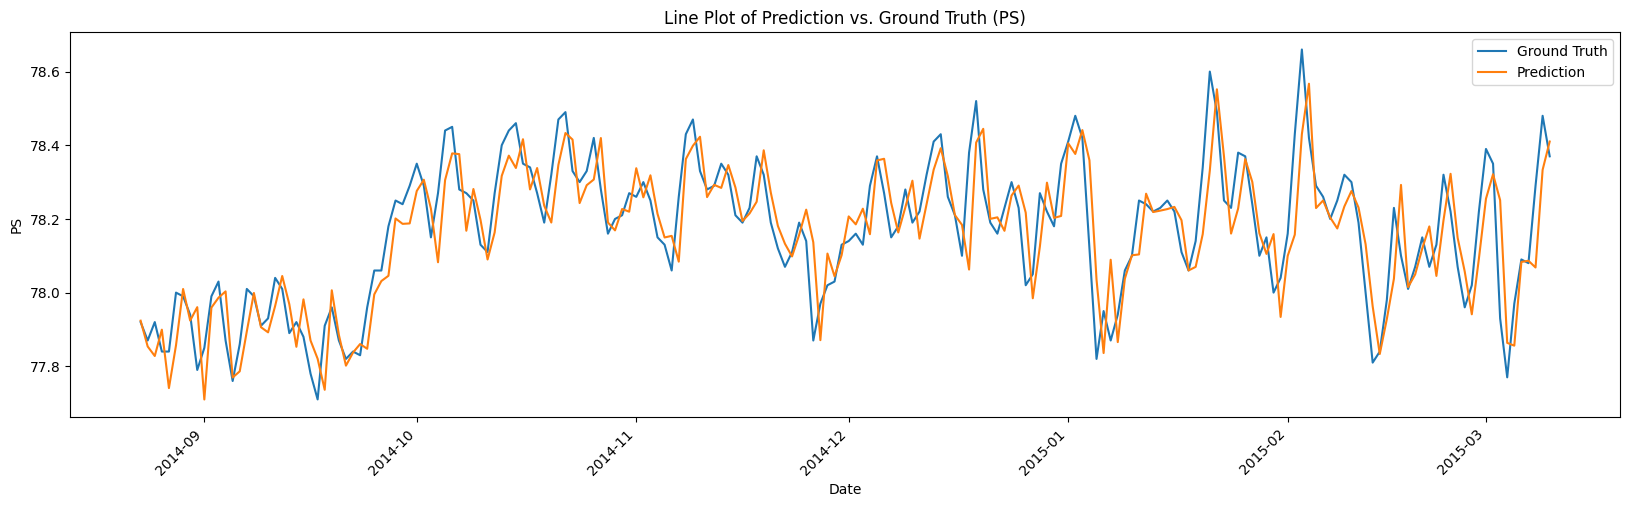

In [18]:
import matplotlib.pyplot as plt
st=0;end=200
date_range = pd.date_range('8/23/2014', '12/31/2019')
# Plot the data
plt.figure(figsize=(20, 5))
plt.plot(date_range[st:end],Y_test_de[st:end,0], label="Ground Truth")
plt.plot(date_range[st:end],Y_pred_de[st:end,0], label="Prediction")

# Set the labels and title
plt.xlabel("Date")
plt.ylabel("PS")
plt.title("Line Plot of Prediction vs. Ground Truth (PS)")

# Add a legend
plt.legend()
plt.xticks(rotation=45, ha='right')
# Show the plot
plt.show()

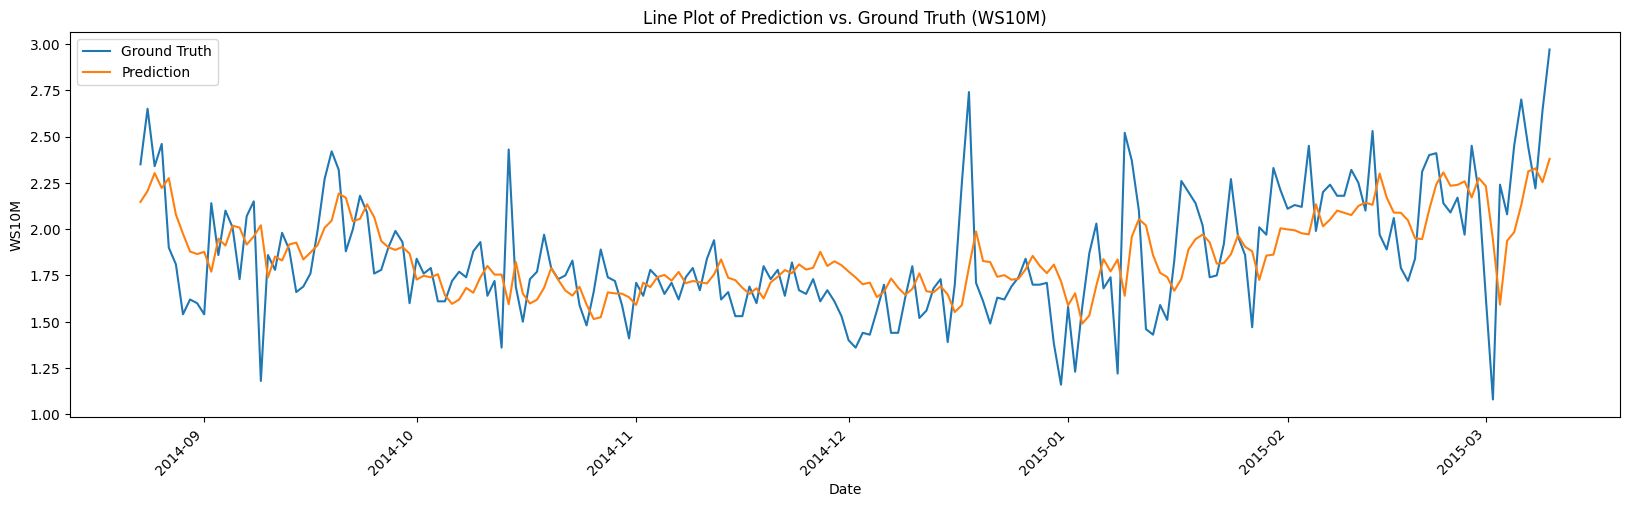

In [19]:
st=0;end=200
date_range = pd.date_range('8/23/2014', '12/31/2019')
# Plot the data
plt.figure(figsize=(20, 5))
plt.plot(date_range[st:end],Y_test_de[st:end,1], label="Ground Truth")
plt.plot(date_range[st:end],Y_pred_de[st:end,1], label="Prediction")

# Set the labels and title
plt.xlabel("Date")
plt.ylabel("WS10M")
plt.title("Line Plot of Prediction vs. Ground Truth (WS10M)")
# Add a legend
plt.legend()
plt.xticks(rotation=45, ha='right')
# Show the plot
plt.show()

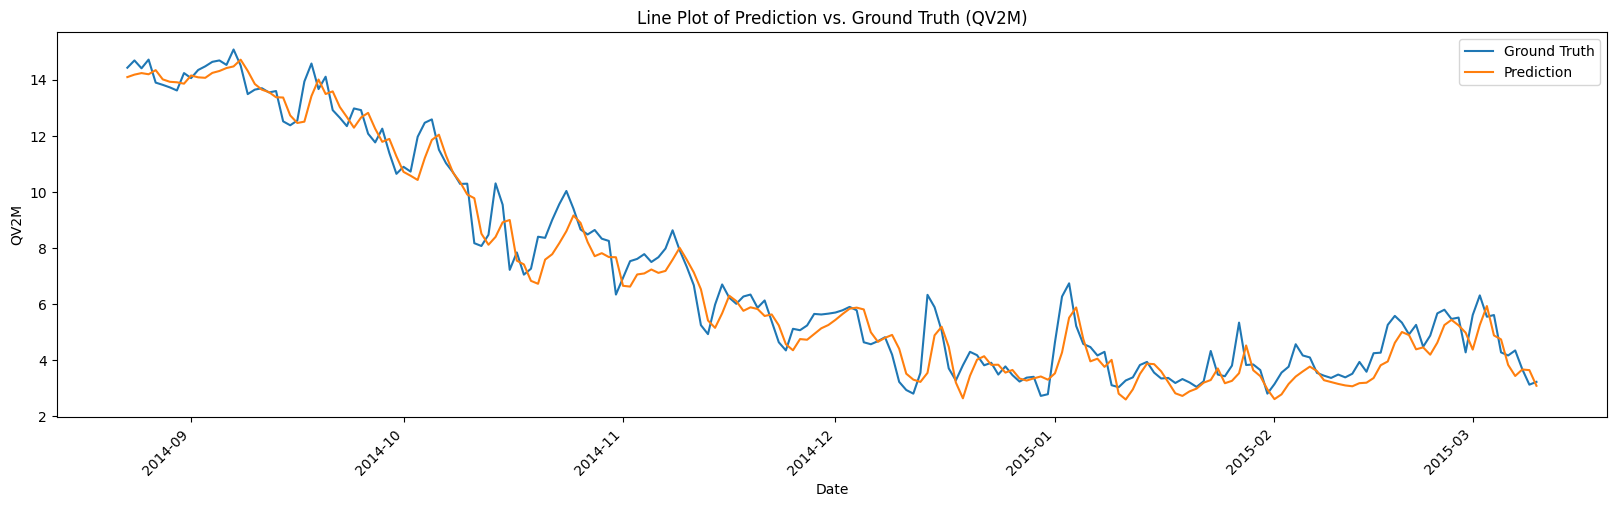

In [20]:
import matplotlib.pyplot as plt
st=0;end=200
date_range = pd.date_range('8/23/2014', '12/31/2019')
# Plot the data
plt.figure(figsize=(20, 5))
plt.plot(date_range[st:end],Y_test_de[st:end,2], label="Ground Truth")
plt.plot(date_range[st:end],Y_pred_de[st:end,2], label="Prediction")

# Set the labels and title
plt.xlabel("Date")
plt.ylabel("QV2M")
plt.title("Line Plot of Prediction vs. Ground Truth (QV2M)")

# Add a legend
plt.legend()
plt.xticks(rotation=45, ha='right')
# Show the plot
plt.show()

2014-08-23 00:00:00
2015-03-10 00:00:00


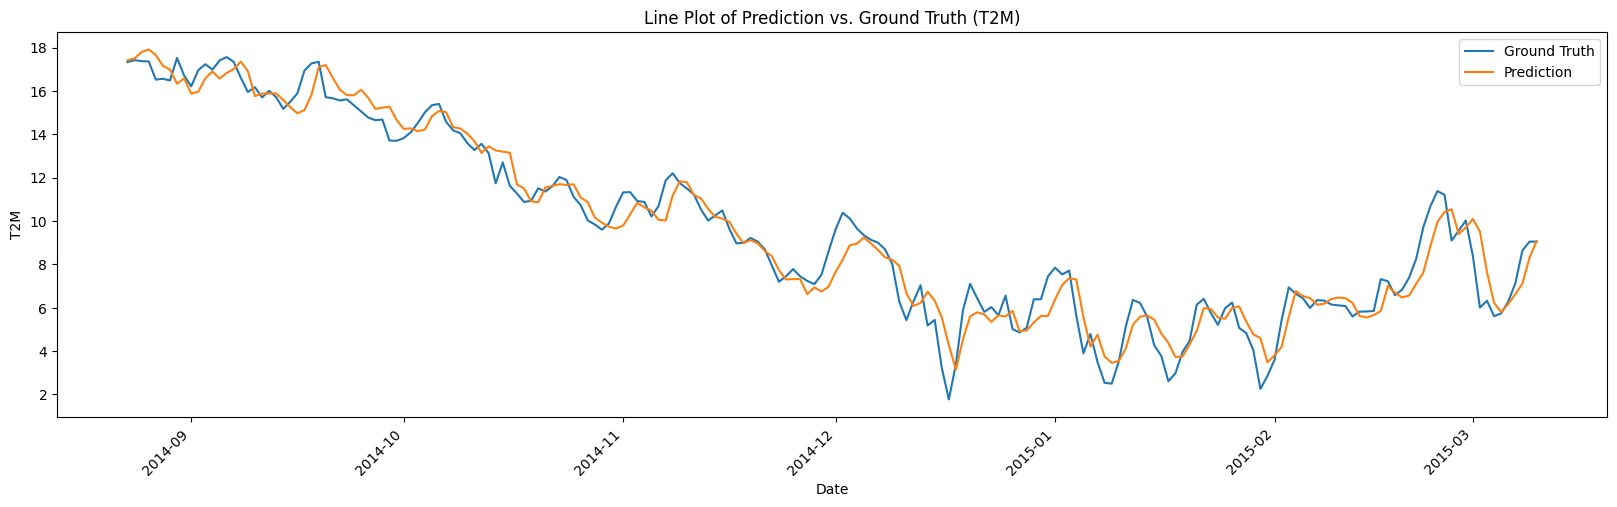

In [21]:
import matplotlib.pyplot as plt
st=0;end=200
date_range = pd.date_range('8/23/2014', '12/31/2019')
print(date_range[0])
print(date_range[200-1])
# Plot the data
plt.figure(figsize=(20, 5))
plt.plot(date_range[st:end],Y_test_de[st:end,3], label="Ground Truth")
plt.plot(date_range[st:end],Y_pred_de[st:end,3], label="Prediction")

# Set the labels and title
plt.xlabel("Date")
plt.ylabel("T2M")
plt.title("Line Plot of Prediction vs. Ground Truth (T2M)")

# Add a legend
plt.legend()
plt.xticks(rotation=45, ha='right')
# Show the plot
plt.show()